<h1><strong><u>Spam Classifier Model</u></strong></h1>

In [1]:
%%capture
%run LogisticSpamClassifier.ipynb
%run NBSpamClassifier.ipynb

In [2]:
nb_model = nb_spam_classifier()
log_model = log_spam_classifier()
print(nb_model)
print(log_model)

Pipeline(steps=[('vect',
                 CountVectorizer(strip_accents='unicode', token_pattern=None,
                                 tokenizer=<function custom_tokenizer at 0x16218ed40>)),
                ('samp', SMOTE(random_state=3)),
                ('clf', MultinomialNB(alpha=0.1))])
Pipeline(steps=[('vect',
                 TfidfVectorizer(token_pattern=None,
                                 tokenizer=<function custom_tokenizer at 0x161f7a020>)),
                ('samp', SMOTE(random_state=3)),
                ('clf', LogisticRegression(C=1))])


<h2><strong><u>Final Model Selection</u></strong></h2>

<h3><strong><u>Cross-Validation Test</u></strong></h3>

In [3]:
pipeline = ImbLearn_Pipeline(
    [
        ("pl", None)
    ]
) 
param_grid = {"pl": [nb_model, log_model]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=custom_f1_scorer_spam, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters:  {'pl': Pipeline(steps=[('vect',
                 TfidfVectorizer(token_pattern=None,
                                 tokenizer=<function custom_tokenizer at 0x161f7a020>)),
                ('samp', SMOTE(random_state=3)),
                ('clf', LogisticRegression(C=1))])}


<h2><strong><u>Model Testing</u></strong></h2>

<h3><strong><u>Performance Metrics</u></strong></h3>

In [4]:
test_predictions = best_model.predict(X_test)

In [5]:
for key, value in clf_metrics.items():
    print(f"{key}")
    log_test_values = cross_val_score(best_model, X_test, y=y_test, scoring=value, cv=5)
    print(f"CV test Scores: ", log_test_values)
    np_log_test_values = np.array(log_test_values)
    average = np.mean(np_log_test_values)
    stDev = np.std(np_log_test_values)
    print(f"Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV test Scores:  [0.98206278 0.97757848 0.98206278 0.96860987 0.97309417]
Average and Standard Error:  0.98% ± 0.52% 

F1 Score (Spam)
CV test Scores:  [0.93548387 0.91803279 0.9375     0.87272727 0.90322581]
Average and Standard Error:  0.91% ± 2.39% 

F1 Score (Ham)
CV test Scores:  [0.98958333 0.98701299 0.9895288  0.98209719 0.984375  ]
Average and Standard Error:  0.99% ± 0.29% 



Text(0.5, 1.0, 'Final Spam Classifier: Confusion Matrix (Test)')

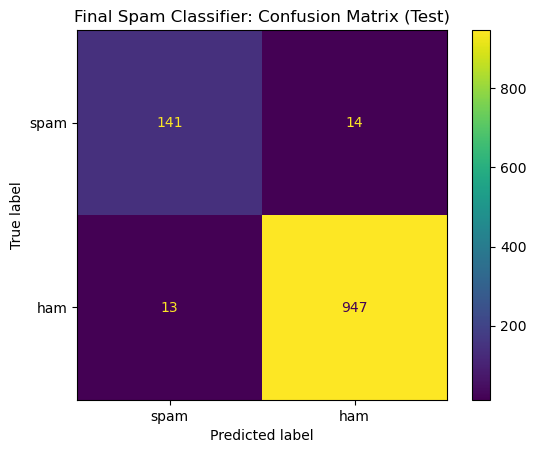

In [6]:
#Testing Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, test_predictions, labels=['spam', 'ham'])
disp.ax_.set_title("Final Spam Classifier: Confusion Matrix (Test)")

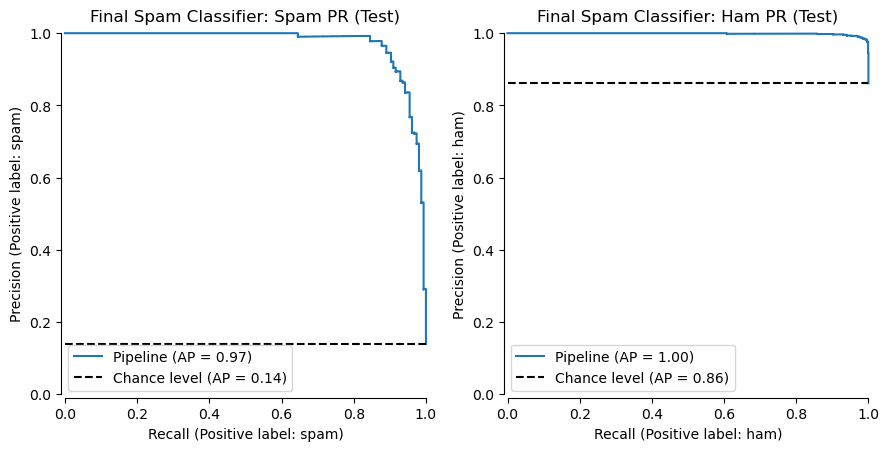

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(9, 9))
axs = axs.flatten()
count = 0
for label in test_labels:
    disp = PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=axs[count], pos_label=label, plot_chance_level=True, despine=True)
    disp.ax_.set_title(f"Final Spam Classifier: {label.title()} PR (Test)")
    count += 1

plt.tight_layout()  
plt.show()

<h1><strong><u>Final Thoughts</u></strong></h1>
Considering the results of the experiment, I believe this model can used for spam classification. One caveat to mention is that more actual positive cases would be needed to truly access how much predictive power this model holds.